# Unsupervised learning

## k-means clustering

(-6.0, 6.0, -3.0, 3.0)

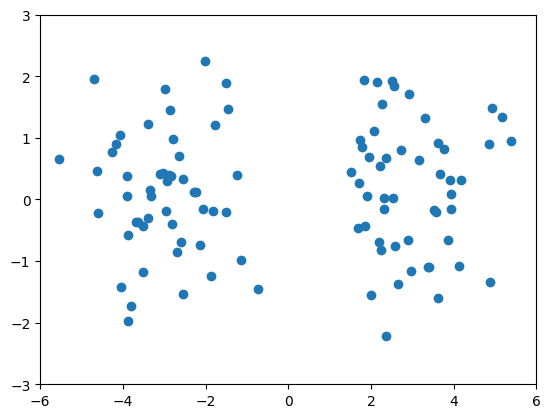

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.vstack([np.random.randn(50,2) + [-3,0], np.random.randn(50,2) + [3,0]])
plt.scatter(X[:,0], X[:,1])
plt.axis([-6,6,-3,3])

In [2]:
colors = np.array(["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11"])
def kmeans_visualize(X, k, max_iter=10, rand_seed=0):
    f,ax = plt.subplots(max_iter, figsize=(6.0, 4.6*max_iter))
    np.random.seed(rand_seed)
    Mu = X[np.random.choice(X.shape[0],k),:]
    for i in range(max_iter):
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        y = np.argmin(D,axis=1)
        ax[i].scatter(X[:,0], X[:,1], c=colors[y])
        ax[i].scatter(Mu[:,0], Mu[:,1], c='k')
        
        Mu = np.array([np.mean(X[y==i],axis=0) for i in range(k)])
    loss = np.linalg.norm(X - Mu[np.argmin(D,axis=1),:])**2/X.shape[0]
    return Mu, y, loss

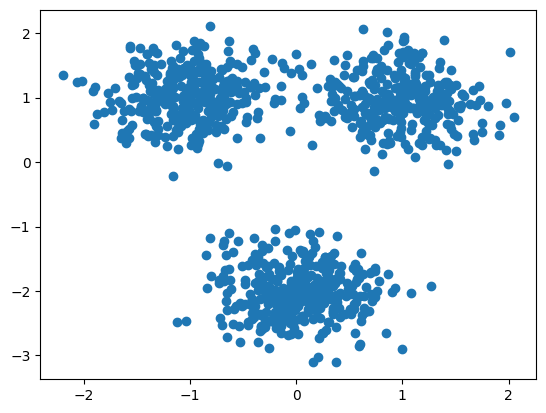

In [3]:
X = m,n = (1000,2)
np.random.seed(0)
X = 0.4*np.random.randn(m,n)
Mu0 = np.array([[0,-2], [-1,1], [1,1]])
X += Mu0[np.random.choice(np.arange(3), m),:]
plt.scatter(X[:,0], X[:,1])

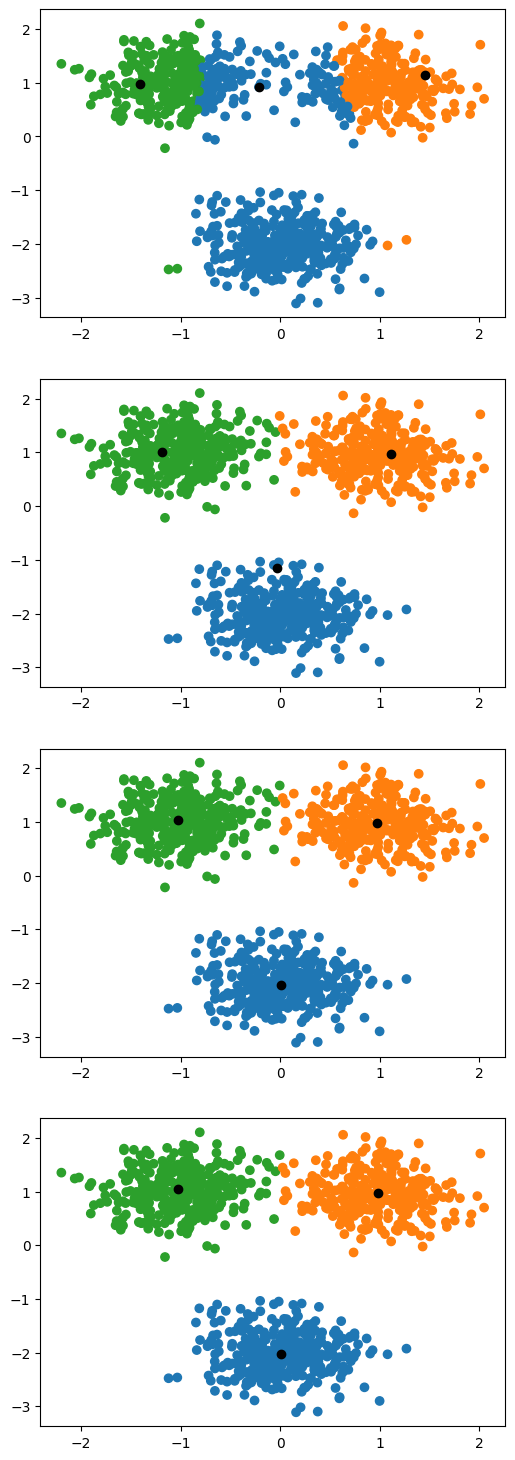

In [6]:
kmeans_visualize(X, 3, max_iter=4, rand_seed = 3);

In [7]:
def kmeans(X, k, max_iter=10, rand_seed=0):
    np.random.seed(rand_seed)
    Mu = X[np.random.choice(X.shape[0],k),:]
    for i in range(max_iter):
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        y = np.argmin(D,axis=1)
        Mu = np.array([np.mean(X[y==i],axis=0) for i in range(k)])
    loss = np.linalg.norm(X - Mu[np.argmin(D,axis=1),:])**2/X.shape[0]
    return Mu, y, loss

Text(0, 0.5, 'Average loss')

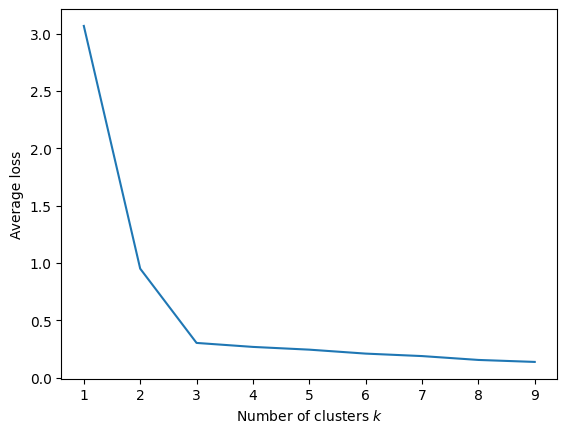

In [8]:
losses = [kmeans(X,k,max_iter=10,rand_seed=0)[2] for k in range(1,10)]
plt.plot(range(1,10), losses)
plt.xlabel("Number of clusters $k$")
plt.ylabel("Average loss")

## Dimensionality reduction

**Principal Component Analysis (PCA)** is a widely used technique for dimensionality reduction in machine learning and data analysis. PCA transforms the original high dimensional data into a lower dimensional space, while preserving most of the variance. This is accomplished by applying a linear orthogonal transformation to a different system of coordinates, where the first principal component explain most of the data variance. PCA helps us effectively reduce dimensionality, resulting in a dataset that is easier to visualize and interpret.

In [9]:
import pandas as pd 
import numpy as np # Here we are using inbuilt dataset of scikit learn 
from sklearn.datasets import load_breast_cancer # instantiating 
cancer = load_breast_cancer(as_frame=True) 
# creating dataframe 
df = cancer.frame # checking shape 
print('Original Dataframe shape :',df.shape) # Input features 
X = df[cancer['feature_names']] 
print('Inputs Dataframe shape :', X.shape)

Original Dataframe shape : (569, 31)
Inputs Dataframe shape : (569, 30)


In [10]:
X_mean = X.mean()
X_std = X.std()
X_normalized = (X - X_mean) / X_std

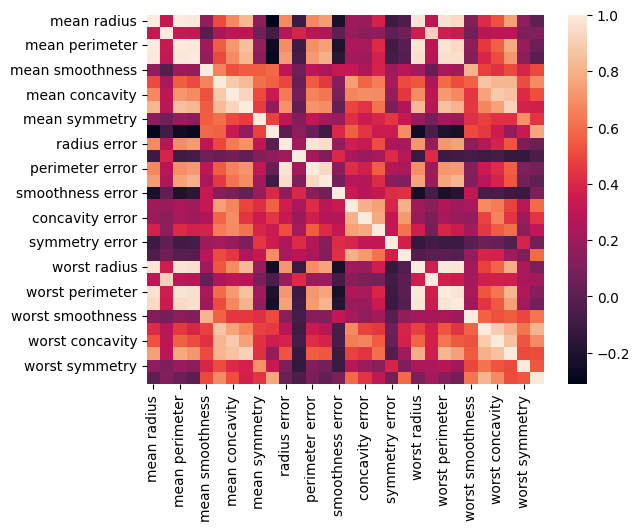

In [11]:
# covariance 
c = X_normalized.cov() # Plot the covariance matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.heatmap(c) 
plt.show()

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(c) 
print('Eigen values:\n', eigenvalues) 
print('Eigen values Shape:', eigenvalues.shape) 
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


In [13]:
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1] # Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx] # sort the corresponding eigenvectors accordingly 
eigenvectors = eigenvectors[:,idx]

In [14]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues) 
print(explained_var)

[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


In [15]:
n_components = np.argmax(explained_var >= 0.50) + 1 
print(n_components)

2


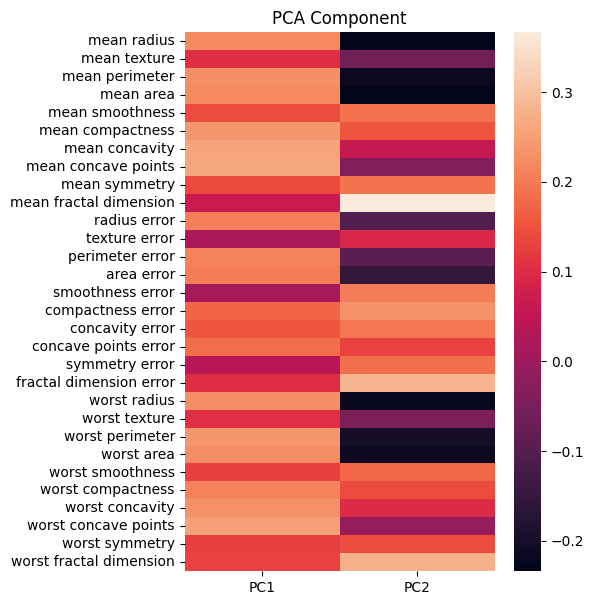

In [16]:
# PCA component or unit matrix 
u = eigenvectors[:,:n_components] 
pca_component = pd.DataFrame(u, index = cancer['feature_names'], columns = ['PC1','PC2'] ) 
# plotting heatmap 
plt.figure(figsize =(5, 7)) 
sns.heatmap(pca_component) 
plt.title('PCA Component') 
plt.show()

In [17]:
# Matrix multiplication or dot Product 
Z_pca = X_normalized @ pca_component # Rename the columns name 
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True) # Print the Pricipal Component values 
print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


**Using sklearn**

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_normalized)
x_pca = pca.transform(X_normalized)

df_pca1 = pd.DataFrame(x_pca, columns=['PC{}'. format(i+1) for i in range(n_components)]) 
print(df_pca1)

           PC1        PC2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


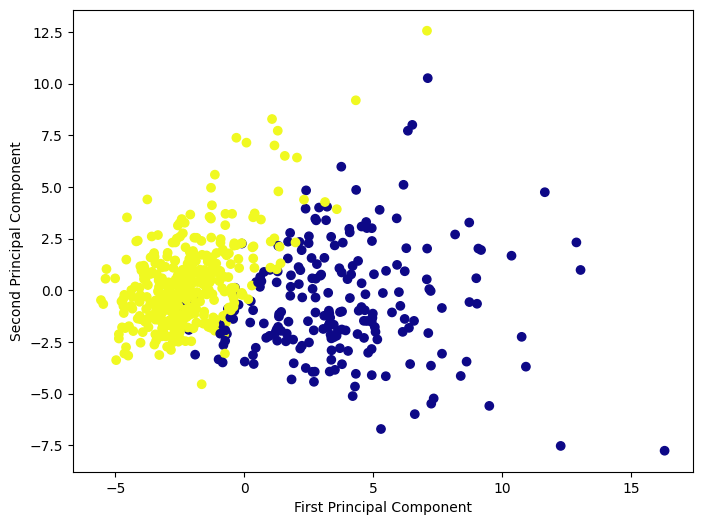

In [19]:
# giving a larger plot 
plt.figure(figsize=(8, 6)) 
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'], cmap='plasma') 
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 
plt.show()